<a href="https://colab.research.google.com/github/ParthPanchall/Paddy-Doctor/blob/main/PADDY_DOCTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PADDY DOCTOR 🧑🏻‍⚕️🩺

Download the dataset from


> https://www.kaggle.com/competitions/paddy-disease-classification/data

There are totally 10 classes

1. `bacterial_leaf_blight`
2. `bacterial_leaf_streak`
3. `bacterial_panicle_blight`
4. `blast`
5. `brown_spot`
6. `dead_heart`
7. `downy_mildew`
8. `hispa`
9. `normal`
10. `tungro`

# Using `kaggle` API to download datasets

## Creating kaggle.json to store the downloaded datsets

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()          # expire any previous token(s) and upload recreated token
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list


Saving kaggle.json to kaggle.json
ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04          12541        359  1.0              
whenamancodes/hr-employee-attrition                            Employee Analysis | Attrition Report                 50KB  2022-09-12 10:46:33           1114         34  1.0              
pantanjali/unemployment-dataset                                Unemployment dataset                                 17KB  2022-09-08 08:26:10           4241        107  1.0              
whenamancodes/student-performan

## Downloading datasets

In [ ]:
!kaggle competitions download -c paddy-disease-classification  # u need to accept the competition rules to download

100% 1.02G/1.02G [00:09<00:00, 77.0MB/s]
100% 1.02G/1.02G [00:09<00:00, 111MB/s] 


## Creating directory `data` in which we are going to store the entrire dataset

In [ ]:
!mkdir data

## Unzipping the downloaded datasets

In [ ]:
!unzip paddy-disease-classification.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/train_images/downy_mildew/100992.jpg  
  inflating: data/train_images/downy_mildew/100995.jpg  
  inflating: data/train_images/downy_mildew/101015.jpg  
  inflating: data/train_images/downy_mildew/101020.jpg  
  inflating: data/train_images/downy_mildew/101022.jpg  
  inflating: data/train_images/downy_mildew/101024.jpg  
  inflating: data/train_images/downy_mildew/101034.jpg  
  inflating: data/train_images/downy_mildew/101050.jpg  
  inflating: data/train_images/downy_mildew/101078.jpg  
  inflating: data/train_images/downy_mildew/101096.jpg  
  inflating: data/train_images/downy_mildew/101103.jpg  
  inflating: data/train_images/downy_mildew/101114.jpg  
  inflating: data/train_images/downy_mildew/101119.jpg  
  inflating: data/train_images/downy_mildew/101142.jpg  
  inflating: data/train_images/downy_mildew/101177.jpg  
  inflating: data/train_images/downy_mildew/101178.jpg  
  inflating: data/train_images/downy_

# Data Visualization

## Importing Necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import Image
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import imread
import tensorflow_hub as hub

In [ ]:
labels = pd.read_csv("data/train.csv")
labels

image_id                  label variety  age
0      100330.jpg  bacterial_leaf_blight   ADT45   45
1      100365.jpg  bacterial_leaf_blight   ADT45   45
2      100382.jpg  bacterial_leaf_blight   ADT45   45
3      100632.jpg  bacterial_leaf_blight   ADT45   45
4      101918.jpg  bacterial_leaf_blight   ADT45   45
...           ...                    ...     ...  ...
10402  107607.jpg                 tungro   Zonal   55
10403  107811.jpg                 tungro   Zonal   55
10404  108547.jpg                 tungro   Zonal   55
10405  110245.jpg                 tungro   Zonal   55
10406  110381.jpg                 tungro   Zonal   55

[10407 rows x 4 columns]

## Let's see the counts of the classes in our datasest

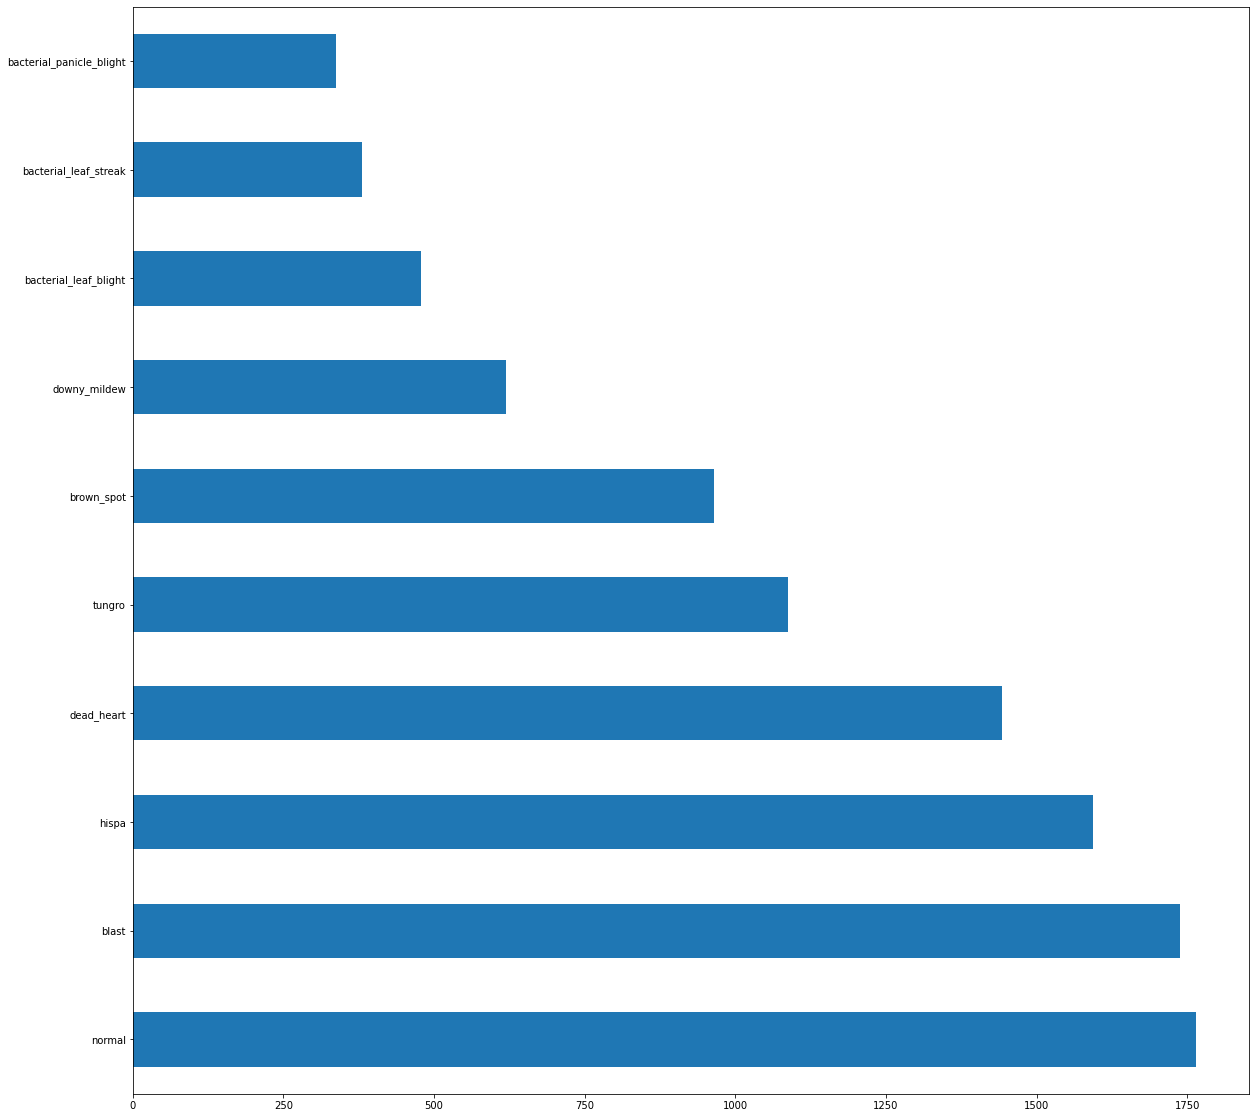

In [ ]:
labels["label"].value_counts().plot.barh(figsize=(20,20))

## Visualizing one image

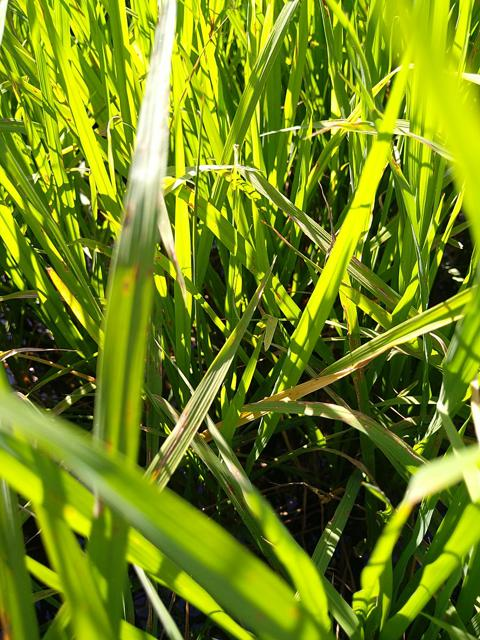

In [ ]:
Image("data/train_images/blast/100004.jpg")

## Creating variable which stores the path directory of the data sets

In [ ]:
# create pathname from labels id
filenames = ["data/train_images/"+ dirname + "/" for dirname in labels["label"]]
filenames = [ filenames[i] + labels['image_id'][i] for i in range(len(labels['image_id']))]

filenames[:10]

['data/train_images/bacterial_leaf_blight/100330.jpg',
 'data/train_images/bacterial_leaf_blight/100365.jpg',
 'data/train_images/bacterial_leaf_blight/100382.jpg',
 'data/train_images/bacterial_leaf_blight/100632.jpg',
 'data/train_images/bacterial_leaf_blight/101918.jpg',
 'data/train_images/bacterial_leaf_blight/102353.jpg',
 'data/train_images/bacterial_leaf_blight/102848.jpg',
 'data/train_images/bacterial_leaf_blight/103051.jpg',
 'data/train_images/bacterial_leaf_blight/103702.jpg',
 'data/train_images/bacterial_leaf_blight/103920.jpg']

In [ ]:
# test_dir = ["data/test_images/"+ dirname + "/" for dirname in labels["label"]]
# test_dir

In [ ]:
train_dir = [ filenames[i] + labels['image_id'][i] for i in range(len(labels['image_id']))]

In [ ]:
train_dir

['data/train_images/bacterial_leaf_blight/100330.jpg100330.jpg',
 'data/train_images/bacterial_leaf_blight/100365.jpg100365.jpg',
 'data/train_images/bacterial_leaf_blight/100382.jpg100382.jpg',
 'data/train_images/bacterial_leaf_blight/100632.jpg100632.jpg',
 'data/train_images/bacterial_leaf_blight/101918.jpg101918.jpg',
 'data/train_images/bacterial_leaf_blight/102353.jpg102353.jpg',
 'data/train_images/bacterial_leaf_blight/102848.jpg102848.jpg',
 'data/train_images/bacterial_leaf_blight/103051.jpg103051.jpg',
 'data/train_images/bacterial_leaf_blight/103702.jpg103702.jpg',
 'data/train_images/bacterial_leaf_blight/103920.jpg103920.jpg',
 'data/train_images/bacterial_leaf_blight/104800.jpg104800.jpg',
 'data/train_images/bacterial_leaf_blight/106539.jpg106539.jpg',
 'data/train_images/bacterial_leaf_blight/108320.jpg108320.jpg',
 'data/train_images/bacterial_leaf_blight/108541.jpg108541.jpg',
 'data/train_images/bacterial_leaf_blight/100049.jpg100049.jpg',
 'data/train_images/bacte

In [ ]:
len(filenames)

10407

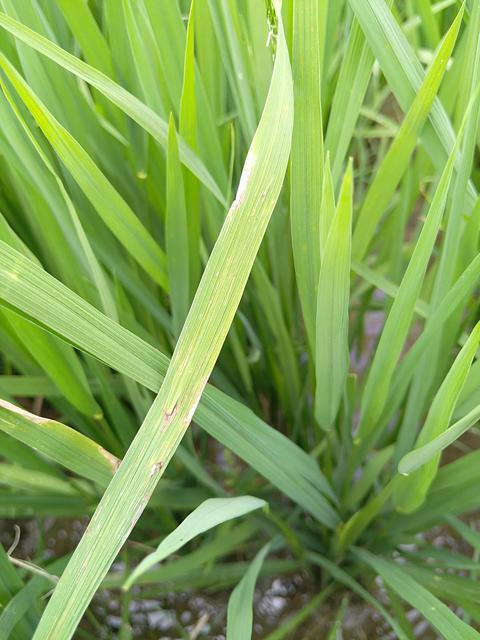

In [ ]:
Image(filenames[2000])

In [ ]:
labels_b = labels["label"]
labels_b = np.array(labels_b)
labels_b , labels_b.shape

(array(['bacterial_leaf_blight', 'bacterial_leaf_blight',
        'bacterial_leaf_blight', ..., 'tungro', 'tungro', 'tungro'],
       dtype=object), (10407,))

In [ ]:
if len(filenames) == len(labels_b):
    print("They are matched : )")
else:
    print("They are not matched :(")

They are matched : )


In [ ]:
# find the unique labels
unique_disease = np.unique(labels_b)
unique_disease

array(['bacterial_leaf_blight', 'bacterial_leaf_streak',
       'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart',
       'downy_mildew', 'hispa', 'normal', 'tungro'], dtype=object)

In [ ]:
# converting a single unique disease to boolean
labels_b[0] == unique_disease

array([ True, False, False, False, False, False, False, False, False,
       False])

In [ ]:
boolean_labels = [label == unique_disease for label in labels_b] # list comprehension
len(boolean_labels)  # for every unique disease we have got arrays of boolean values

10407

In [ ]:
# Example : Turning boolean values into the integers
index = 2000
print(labels_b[index])
print(np.where(unique_disease == labels_b[index]))
print(boolean_labels[index].argmax()) # returns index of the max element
print(boolean_labels[index].astype(int))

blast
(array([3]),)
3
[0 0 0 1 0 0 0 0 0 0]


In [ ]:
# create x and y labels
x = filenames
y = boolean_labels

# splitting the train and test data set by 80:20 ratio

In [ ]:

x_train , x_valid , y_train , y_valid = train_test_split(x,y,test_size=0.2)

len(x_train) , len(x_valid) , len(y_train) , len(y_valid)

(8325, 2082, 8325, 2082)

# PreProcessing Images (turning images into Tensors)

In [ ]:
# convert image into an numpy array
image = imread(filenames[69])

In [ ]:
image , image.shape

(array([[[226, 241, 198],
         [214, 229, 190],
         [206, 219, 189],
         ...,
         [159, 202,  27],
         [156, 197,  30],
         [181, 222,  56]],
 
        [[236, 251, 212],
         [235, 249, 214],
         [223, 236, 210],
         ...,
         [142, 184,  12],
         [151, 192,  25],
         [181, 222,  56]],
 
        [[231, 245, 212],
         [228, 241, 215],
         [209, 221, 201],
         ...,
         [125, 169,   0],
         [142, 185,  17],
         [180, 223,  56]],
 
        ...,
 
        [[ 60,  88,  11],
         [ 66,  95,  15],
         [ 72, 101,  17],
         ...,
         [ 33,  73,   3],
         [ 29,  68,   3],
         [ 30,  69,   6]],
 
        [[ 53,  79,   8],
         [ 57,  85,  11],
         [ 62,  90,  13],
         ...,
         [ 35,  75,   5],
         [ 32,  71,   6],
         [ 31,  70,   5]],
 
        [[ 38,  63,   0],
         [ 44,  71,   0],
         [ 51,  79,   4],
         ...,
         [ 37,  77,   7],
  

In [ ]:
# converting into Tensors
tf.constant(image)

<tf.Tensor: shape=(640, 480, 3), dtype=uint8, numpy=
array([[[226, 241, 198],
        [214, 229, 190],
        [206, 219, 189],
        ...,
        [159, 202,  27],
        [156, 197,  30],
        [181, 222,  56]],

       [[236, 251, 212],
        [235, 249, 214],
        [223, 236, 210],
        ...,
        [142, 184,  12],
        [151, 192,  25],
        [181, 222,  56]],

       [[231, 245, 212],
        [228, 241, 215],
        [209, 221, 201],
        ...,
        [125, 169,   0],
        [142, 185,  17],
        [180, 223,  56]],

       ...,

       [[ 60,  88,  11],
        [ 66,  95,  15],
        [ 72, 101,  17],
        ...,
        [ 33,  73,   3],
        [ 29,  68,   3],
        [ 30,  69,   6]],

       [[ 53,  79,   8],
        [ 57,  85,  11],
        [ 62,  90,  13],
        ...,
        [ 35,  75,   5],
        [ 32,  71,   6],
        [ 31,  70,   5]],

       [[ 38,  63,   0],
        [ 44,  71,   0],
        [ 51,  79,   4],
        ...,
        [ 37,  77,   

In [ ]:
# define image size
IMG_SIZE = 224

## Converting an image into numpy array and resizing all images in a fixed size

In [ ]:
def preprocess_image(img_path, img_size=IMG_SIZE):
    """
    Take an image file as an input and convert into the Tensors.
    """

    # Read in an image file
    image = tf.io.read_file(img_path)

    # Turn the jpeg image into numerical Tensor with 3 color channel (RGB)
    image = tf.image.decode_jpeg(image, channels=3)

    # convert the color channels from 0-255 to 0-1
    image = tf.image.convert_image_dtype(image, tf.float32)

    # Resize the image to the desired values
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

    return image

# Turning our data into the batches of 32

Batches means set of 32 will train at a time and next 32 like wise entire dataset is trained
We mainly use batches system because if we train 10k + images at a tim ethere will be the shortage of the memory of our GPU
So it is very good to train them into the batches

In order to use Tensorflow effiectively we should use the labels as tuple `(image, label)`

In [ ]:
# Create a simple function

def get_image_label(img_path, labels):
    """
    Takes an image path as an input and return as of them tuple of image and label
    """

    image = preprocess_image(img_path)

    return image, labels

In [ ]:
preprocess_image(x[42], tf.constant(y[42]))

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6357343 , 0.75338143, 0.27495   ],
        [0.7052421 , 0.8150461 , 0.34837937],
        [0.7254502 , 0.8313326 , 0.372509  ],
        ...,
        [0.65434176, 0.82581043, 0.09851953],
        [0.6588233 , 0.81736684, 0.07114833],
        [0.7186473 , 0.85590225, 0.11864731]],

       [[0.68879557, 0.8095239 , 0.3372549 ],
        [0.7305722 , 0.85046023, 0.38071233],
        [0.72216886, 0.8350541 , 0.36838737],
        ...,
        [0.6509804 , 0.8224091 , 0.10308132],
        [0.6684271 , 0.8238894 , 0.09699855],
        [0.7366945 , 0.8700279 , 0.15450163]],

       [[0.65210086, 0.787355  , 0.32577032],
        [0.6960384 , 0.83009213, 0.3609444 ],
        [0.69431776, 0.8203282 , 0.33929572],
        ...,
        [0.64761907, 0.8184875 , 0.10884357],
        [0.6774707 , 0.8281711 , 0.12677036],
        [0.7532612 , 0.8801519 , 0.20108022]],

       ...,

       [[0.35710293, 0.5727892 , 0.10892393],
        [0.32

In [ ]:
# Define the batch size
BATCH_SIZE = 32



## Create a function to convert the data into the batches

In [ ]:

def create_batches(x, y=None, batch_size=BATCH_SIZE,val_data=False, test_data=False):
    """
    Create batches of data of our images (X) and (Y)
    Shuffle the data if it's training data but doesn't shuffle it it's validation data
    Also accepts test data as an input( no labels)
    """

    if test_data:
        print("Creating the test Data Batches......")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))  # only filepaths no labels
        data_batch = data.map(preprocess_image).batch(BATCH_SIZE)
    elif val_data:
        print("Creating the valid Data Batches.....")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    else:
        print("Creating the Training Data Batches....")

        # Turn filepaths and labels into the Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))

        # Shuffling pathnames and labels before mapping image preprocessor funcion is faster than shuffling images
        data = data.shuffle(buffer_size=len(x))

        # Creata a image, label this will also convert the data preprocessed image
        data = data.map(get_image_label)

        # Turning into the data batches
        data_batch = data.batch(BATCH_SIZE)

    return data_batch

## Splitting the batches into train and validation dataset

In [ ]:
# Create the training and validation data batches
train_data = create_batches(x_train, y_train)
valid_data = create_batches(x_valid, y_valid, val_data=True)

Creating the Training Data Batches....
Creating the valid Data Batches.....


In [ ]:
train_data.element_spec , valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 10), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 10), dtype=tf.bool, name=None)))

##Create a function for viewing the images for the data batches

In [ ]:
def show_25_images(image, labels):
    """
    Display a plot of 25 images and their labels from a data batch
    """
    # Setup the figure
    plt.figure(figsize=(10,10))
    # Loop through 25 (for displaying 25 images)
    for i in range(25):
        # Create a subplots ( 5 rows and 5 columns )
        ax = plt.subplot(5 , 5 , i+1)
        # Display an image
        plt.axis("off")
        plt.imshow(image[i])
        # Add the image label as the title
        plt.title(unique_disease[labels[i].argmax()])


In [ ]:
unique_disease[y[0].argmax()]

'bacterial_leaf_blight'

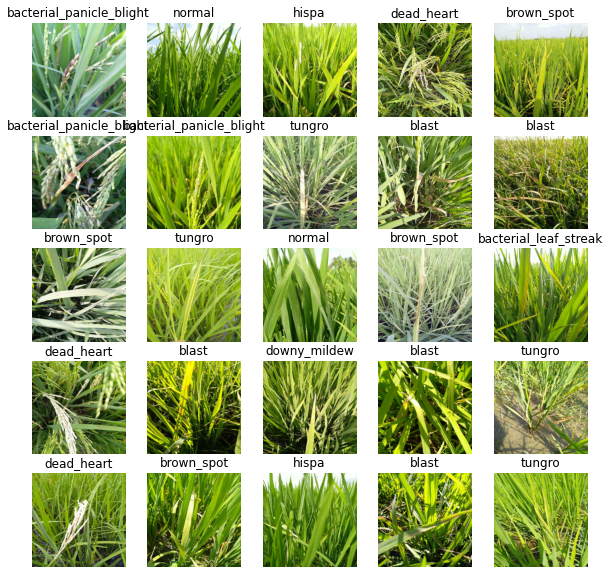

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
# Now let's visualize the data by using the function
show_25_images(train_images, train_labels)

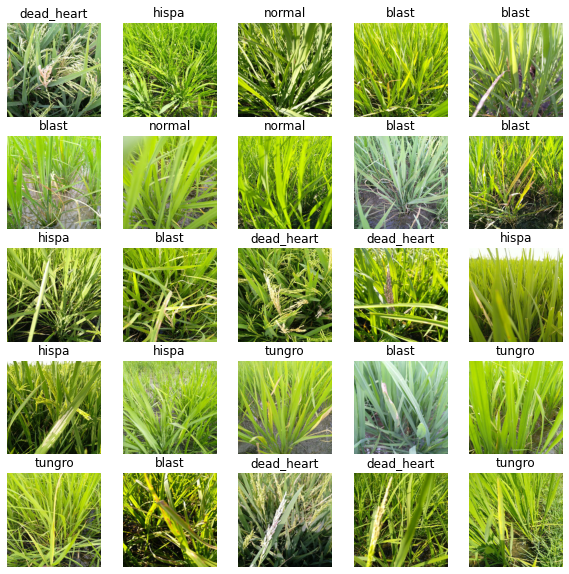

In [ ]:
# now let's visualize the validation data
val_images , val_labels = next(valid_data.as_numpy_iterator())
show_25_images(val_images, val_labels)


# Building a model

We will be building the model by using two model
1. Mobilenet (https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5)
2. VGG16   (https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16)
* Before we build a model, there are few things we need to define:
    * The input shape(our images shape , in the form of Tensors) to our model
    * The output shape(image labels, in the form of Tensors) of our model

## Creating `MobileNet` Model (model1)

In [ ]:
IMG_SIZE

224

In [ ]:
# Setup input shape to the model
# INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] #batch, height, width, color channels
INPUT_SHAPE = (None, IMG_SIZE, IMG_SIZE, 3)
# Setup output shape of our model
OUTPUT_SHAPE = len(unique_disease)

# Setup Model Hub from TensorHub
MODEL_1_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [ ]:
def create_model_MOBILENET(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_1_URL):
    print(f"Building model by using {model_url}")

    # Setup the model layers or we can say instantiate the model
    model = tf.keras.Sequential([
        hub.KerasLayer(model_url), # Layer 1 (input layers)
        tf.keras.layers.Dense(units=output_shape,
                             activation="softmax") # Layer 2 (output layers)
    ])

    # Compile the model

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"]
                  )

    # Build the model
    model.build(input_shape)

    return model

In [ ]:
# Builds a function to train and return the trained model
def train_model(create_model):
    """
    Trains a given model and returns as the Trained model.
    """
    NUM_EPOCHS = 10
    # Create a model
    model = create_model

    # Fit the model

    history = model.fit(x=train_data,
             epochs=NUM_EPOCHS,
             validation_data=valid_data,
             validation_freq=1)

    # Returning the model
    return model, history

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
model_1, history_1 = train_model(create_model_MOBILENET())

Building model by using https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/10
261/261 [==============================] - 47s 128ms/step - loss: 1.5225 - accuracy: 0.4954 - val_loss: 1.2211 - val_accuracy: 0.5970
Epoch 2/10
261/261 [==============================] - 32s 123ms/step - loss: 1.0806 - accuracy: 0.6437 - val_loss: 1.1033 - val_accuracy: 0.6427
Epoch 3/10
261/261 [==============================] - 36s 139ms/step - loss: 0.9290 - accuracy: 0.6957 - val_loss: 1.0600 - val_accuracy: 0.6479
Epoch 4/10
261/261 [==============================] - 33s 126ms/step - loss: 0.8657 - accuracy: 0.7140 - val_loss: 0.9840 - val_accuracy: 0.6734
Epoch 5/10
261/261 [==============================] - 33s 124ms/step - loss: 0.7930 - accuracy: 0.7390 - val_loss: 0.9040 - val_accuracy: 0.7104
Epoch 6/10
261/261 [==============================] - 33s 125ms/step - loss: 0.7726 - accuracy: 0.7456 - val_loss: 0.9164 - val_accuracy: 0.6912
Epoch 7/10
261/261 [==============

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 10)                10020     
                                                                 
Total params: 5,442,733
Trainable params: 10,020
Non-trainable params: 5,432,713
_________________________________________________________________


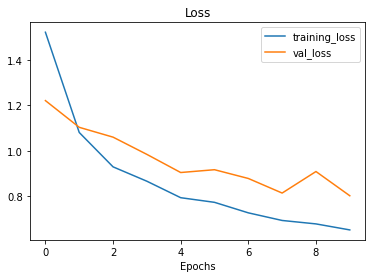

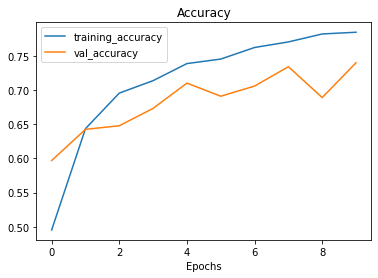

In [ ]:
plot_loss_curves(history_1)

In [ ]:
model_1_accuracy = model_1.evaluate(valid_data)
model_1_accuracy

66/66 [==============================] - 7s 101ms/step - loss: 0.8017 - accuracy: 0.7402


[0.8016518950462341, 0.7401536703109741]

# Making and evaluating predictions using a trained model


In [ ]:
# make prediction on valid data
predictions_valid_data = model_1.predict(valid_data, verbose=1)
predictions_valid_data

66/66 [==============================] - 7s 103ms/step


array([[5.90455147e-06, 4.28381936e-05, 4.28135283e-02, ...,
        1.46619906e-03, 5.64827409e-04, 2.10028302e-04],
       [2.74124797e-02, 1.05697999e-03, 1.13575226e-02, ...,
        5.25036871e-01, 3.64821523e-01, 1.67504642e-02],
       [2.21765775e-04, 1.01624857e-04, 8.90046704e-06, ...,
        5.20409718e-02, 9.41118717e-01, 3.98393051e-04],
       ...,
       [2.94918381e-03, 1.02881575e-04, 1.36516639e-03, ...,
        8.98962855e-01, 5.04407100e-02, 2.37029535e-03],
       [1.05640269e-03, 1.98456692e-03, 2.40276344e-02, ...,
        1.18915543e-01, 1.13520332e-01, 9.16047313e-04],
       [1.67110309e-01, 1.70926675e-01, 3.25320773e-02, ...,
        6.65159151e-02, 1.38257876e-01, 1.09249301e-01]], dtype=float32)

In [ ]:
np.sum(predictions_valid_data[0]) , np.sum(predictions_valid_data[1]) , np.sum(predictions_valid_data[2]) , np.sum(predictions_valid_data[3])

(0.99999994, 1.0, 1.0, 1.0)

In [ ]:
# First Predictions
index = 200

print(predictions_valid_data[index])
print(f"MAx value in the predictions is {np.max(predictions_valid_data[index])}")
print(f"Sum of the values is {np.sum(predictions_valid_data[index])}")
print(f"Max value index is {np.argmax(predictions_valid_data[index])}")
print(f"Max value label is {unique_disease[np.argmax(predictions_valid_data[index])]}")

[9.3601341e-04 5.1801646e-05 2.0483464e-03 6.1911595e-04 1.0731784e-03
 9.8236841e-01 1.8996383e-04 1.1638971e-02 8.9211599e-04 1.8209954e-04]
MAx value in the predictions is 0.9823684096336365
Sum of the values is 1.0
Max value index is 5
Max value label is dead_heart


In [ ]:
# Turning the predcitions probablities into there respective labels

def get_pred_labels(predictions_probabilities):
    """
    Truns the predicition probabilities into there respective labels
    """

    return unique_disease[np.argmax(predictions_probabilities)]


# Get a prediction label based on the specific index
pred_label = get_pred_labels(predictions_valid_data[69])
pred_label

'brown_spot'

In [ ]:
# create a function to unbatch the data
def unbatchify(batch_data):
    """
    Takes an input of the batch data and return into the unbatched data.
    Note it will return as (images, labels)
    """
    # let's now unbatch the data
    images_ = []
    labels_ = []

    for image, label in batch_data.unbatch().as_numpy_iterator():
        # append into the list
        images_.append(image)
        labels_.append(unique_disease[np.argmax(label)])

    return images_, labels_

# now let's unbatchify the batch data
val_images , val_labels = unbatchify(valid_data)

val_labels[0]

'dead_heart'

Let's make some function to make these all a bit more visaulize.

We'll create a function which:

* Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer. ✅
* Convert the prediction probabilities to a predicted label. ✅
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot. ✅

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_labels(pred_prob)


  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

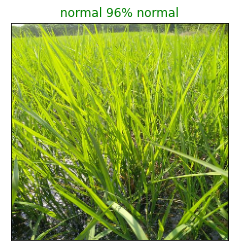

In [ ]:
plot_pred(prediction_probabilities=predictions_valid_data,
          labels=val_labels,
          images=val_images,
          n=99)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_labels(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-11:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_disease[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    #top-plot basically have each bar indexes so argmax return indices of that bar which is true.
  else:
    pass

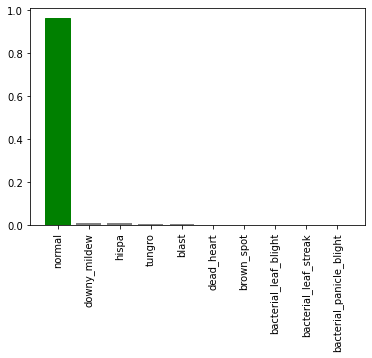

In [ ]:
plot_pred_conf(prediction_probabilities=predictions_valid_data,
                labels=val_labels,
                n=99)

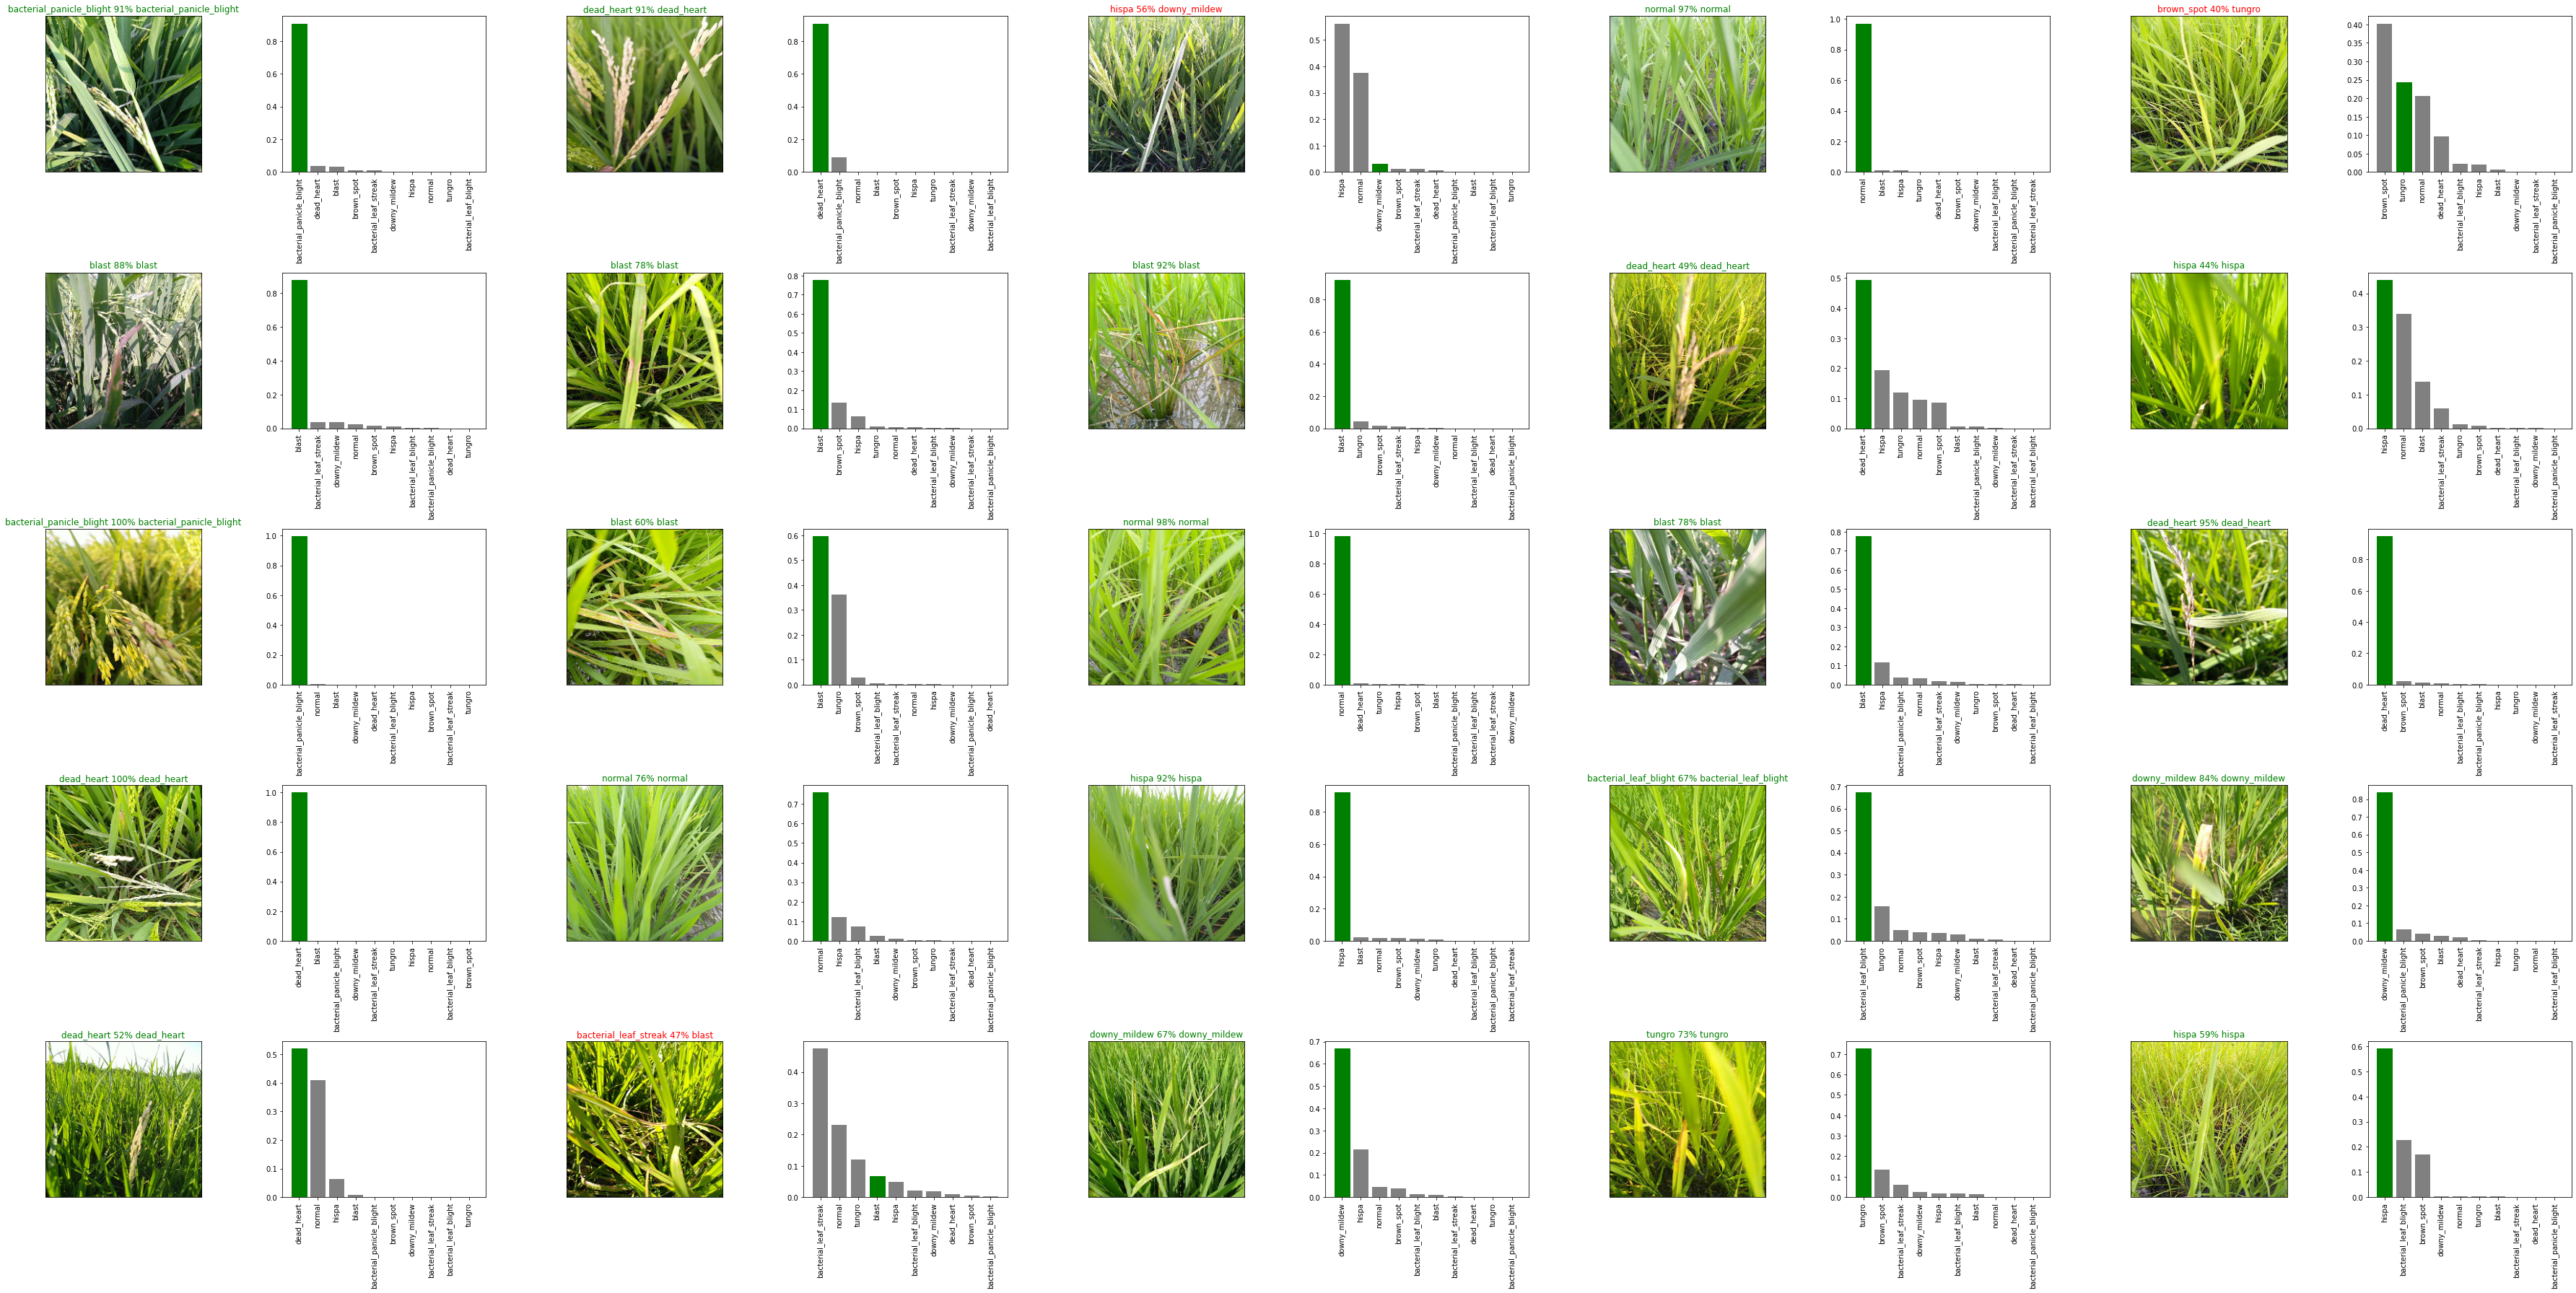

In [ ]:
# Let's check out a few predictions and their different values
i_multiplier = 30
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions_valid_data,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions_valid_data,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.savefig('mobilenet.png', facecolor='w')
plt.show()

# Get Higher Accuracy
Till now we have created , build , predicted the data by using model_1 (`mobilenet`) which achieved accuracy of 70%

Now we are going to build the model by using `VGG16`

# Building (VGG16)
1. model_2 (without finetuning)
2. model_3 (with finetuning)

## Importing Necessary Libraries

In [ ]:
import glob
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras import backend as K

In [ ]:
train_path = "/data/train_images"
n_classes = len(unique_disease)

In [ ]:
def create_model_VGG16(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
  conv_base = VGG16(include_top=False,
                      weights='imagenet',
                      input_shape=input_shape)
  if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
  else:
        for layer in conv_base.layers:
            layer.trainable = False
  top_model = conv_base.output
  top_model = Flatten(name="flatten")(top_model)
  top_model = Dense(1024, activation='relu')(top_model)
  top_model = Dropout(0.2)(top_model)

  output_layer = Dense(n_classes, activation='softmax')(top_model)
  model = Model(inputs=conv_base.input, outputs=output_layer)

  model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

  return model

## Necessary Variables

In [ ]:
INIT_LR = 1e-3
width = IMG_SIZE
height = IMG_SIZE
depth = 3
EPOCHS = 10

In [ ]:
def get_model():
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1
    print(K.image_data_format())
    if K.image_data_format() == "channels_first":
        inputShape = (depth, height, width)
        chanDim = 1
    model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Dense(OUTPUT_SHAPE, activation='softmax'))

    opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
    # distribution
    model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
    return model
model = get_model()

channels_last


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
input_shape = (IMG_SIZE, IMG_SIZE, 3)

# Use a smaller learning rate
optim_2 = Adam(lr=0.0001)


model_2 (without Finetuning)

In [ ]:
model_2, history_2 = train_model(create_model_VGG16(input_shape, n_classes, optim_2, fine_tune=0))

58900480/58889256 [==============================] - 0s 0us/step
Epoch 1/10
261/261 [==============================] - 62s 223ms/step - loss: 1.2437 - accuracy: 0.5984 - val_loss: 0.8408 - val_accuracy: 0.7301
Epoch 2/10
261/261 [==============================] - 56s 214ms/step - loss: 0.5160 - accuracy: 0.8512 - val_loss: 0.5559 - val_accuracy: 0.8415
Epoch 3/10
261/261 [==============================] - 57s 220ms/step - loss: 0.3011 - accuracy: 0.9224 - val_loss: 0.4109 - val_accuracy: 0.8775
Epoch 4/10
261/261 [==============================] - 57s 219ms/step - loss: 0.1862 - accuracy: 0.9581 - val_loss: 0.3584 - val_accuracy: 0.8972
Epoch 5/10
261/261 [==============================] - 57s 219ms/step - loss: 0.1221 - accuracy: 0.9792 - val_loss: 0.4151 - val_accuracy: 0.8746
Epoch 6/10
261/261 [==============================] - 57s 218ms/step - loss: 0.0904 - accuracy: 0.9852 - val_loss: 0.3102 - val_accuracy: 0.9111
Epoch 7/10
261/261 [==============================] - 57s 218ms/s

In [ ]:
model_2_accuracy = model_2.evaluate(valid_data)
model_2_accuracy

66/66 [==============================] - 11s 162ms/step - loss: 0.3356 - accuracy: 0.9020


[0.3356233239173889, 0.9020172953605652]

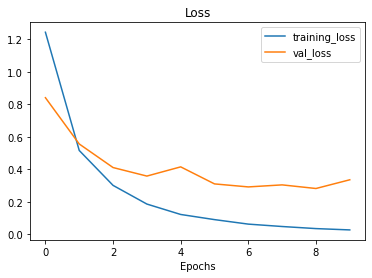

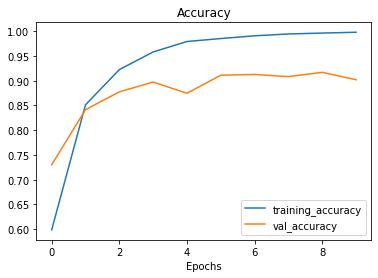

In [ ]:
plot_loss_curves(history_2)

model_3 (with FineTuning)

In [ ]:
model_3, history_3 = train_model(create_model_VGG16(input_shape, n_classes, optim_2, fine_tune=2))

Epoch 1/10
261/261 [==============================] - 60s 225ms/step - loss: 1.1355 - accuracy: 0.6455 - val_loss: 0.6322 - val_accuracy: 0.8141
Epoch 2/10
261/261 [==============================] - 58s 223ms/step - loss: 0.2809 - accuracy: 0.9162 - val_loss: 0.3775 - val_accuracy: 0.8838
Epoch 3/10
261/261 [==============================] - 57s 218ms/step - loss: 0.1042 - accuracy: 0.9742 - val_loss: 0.2820 - val_accuracy: 0.9203
Epoch 4/10
261/261 [==============================] - 58s 224ms/step - loss: 0.0485 - accuracy: 0.9903 - val_loss: 0.2669 - val_accuracy: 0.9246
Epoch 5/10
261/261 [==============================] - 58s 223ms/step - loss: 0.0289 - accuracy: 0.9934 - val_loss: 0.2427 - val_accuracy: 0.9332
Epoch 6/10
261/261 [==============================] - 68s 259ms/step - loss: 0.0196 - accuracy: 0.9964 - val_loss: 0.2612 - val_accuracy: 0.9352
Epoch 7/10
261/261 [==============================] - 58s 222ms/step - loss: 0.0128 - accuracy: 0.9976 - val_loss: 0.2849 - val_ac

In [ ]:
model_3_accuracy = model_3.evaluate(valid_data)
model_3_accuracy

66/66 [==============================] - 11s 166ms/step - loss: 0.2726 - accuracy: 0.9323


[0.2726052403450012, 0.9322766661643982]

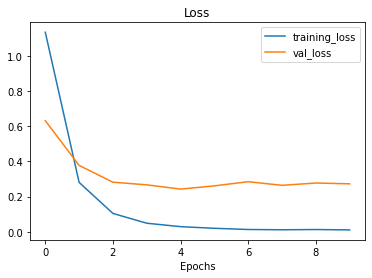

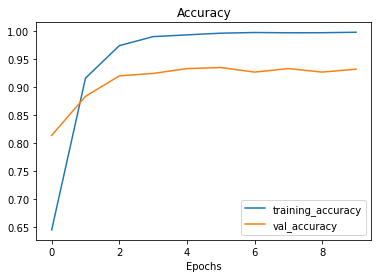

In [ ]:
plot_loss_curves(history_3)

# Using Data Augmentation

Let's try by Augmenting the data and improving `model_3` accuracy

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# create a data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True)

# get the data from the directory and reshape and convert into batch size
train_data_augmented = train_datagen_augmented.flow_from_directory("data/train_images",
                                                                  target_size=(224,224),
                                                                  batch_size=32,
                                                                  class_mode="categorical")

Found 10407 images belonging to 10 classes.


In [ ]:
# Builds a function to train and return the trained model
def train_model(create_model):
    """
    Trains a given model and returns as the Trained model.
    """
    NUM_EPOCHS = 20
    # Create a model
    model = create_model

    # Fit the model

    history = model.fit(x=train_data_augmented,
             epochs=NUM_EPOCHS,
             validation_data=valid_data,
             validation_freq=1)

    # Returning the model
    return model, history

In [ ]:
model_4, history_4 = train_model(create_model_VGG16(input_shape, n_classes, optim_2, fine_tune=2))

Epoch 1/20
326/326 [==============================] - 174s 531ms/step - loss: 1.6156 - accuracy: 0.4494 - val_loss: 1.0729 - val_accuracy: 0.6551
Epoch 2/20
326/326 [==============================] - 173s 531ms/step - loss: 1.0373 - accuracy: 0.6510 - val_loss: 0.7940 - val_accuracy: 0.7426
Epoch 3/20
326/326 [==============================] - 172s 529ms/step - loss: 0.8495 - accuracy: 0.7173 - val_loss: 0.6255 - val_accuracy: 0.7935
Epoch 4/20
326/326 [==============================] - 172s 529ms/step - loss: 0.7073 - accuracy: 0.7710 - val_loss: 0.5391 - val_accuracy: 0.8319
Epoch 5/20
326/326 [==============================] - 173s 530ms/step - loss: 0.6315 - accuracy: 0.7955 - val_loss: 0.5627 - val_accuracy: 0.8228
Epoch 6/20
326/326 [==============================] - 173s 531ms/step - loss: 0.5554 - accuracy: 0.8142 - val_loss: 0.4418 - val_accuracy: 0.8593
Epoch 7/20
326/326 [==============================] - 182s 558ms/step - loss: 0.4987 - accuracy: 0.8413 - val_loss: 0.4292 -

In [ ]:
model_4_accuracy = model_4.evaluate(valid_data)
model_4_accuracy

66/66 [==============================] - 11s 169ms/step - loss: 0.1352 - accuracy: 0.9553


[0.1351623386144638, 0.9553313851356506]

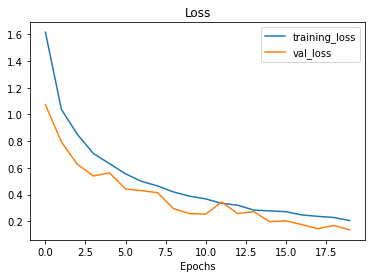

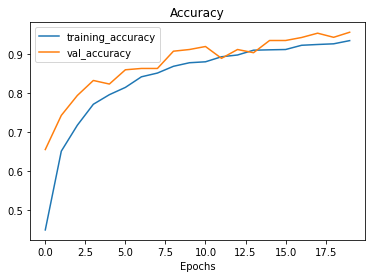

In [ ]:
plot_loss_curves(history_4)

# Selecting Best Model

Till now we have trained 3 models

1. model_1 ( Mobilenet )
2. model_2 (VGG16 -> without finetuning -> fine_tune = 0)
3. model_3 (VGG16 -> with finetuning -> fine_tune = 2)
4. model_4 (VGG16 -> with finetuning -> fine_tune=2 -> Data Augmentation)

We have to select best model among all of the above

In [ ]:
print(f"Model 1 Train Accuracy is {((history_1.history['accuracy'][9]) * 100):.2f}% and Test Accuracy is {((history_1.history['val_accuracy'][9]) * 100):.2f}%\n"
      f"Model 2 Train Accuracy is {((history_2.history['accuracy'][9]) * 100):.2f}% and Test Accuracy is {((history_2.history['val_accuracy'][9]) * 100):.2f}%\n"
      f"Model 3 Train Accuracy is {((history_3.history['accuracy'][9]) * 100):.2f}% and Test Accuracy is {((history_3.history['val_accuracy'][9]) * 100):.2f}%\n"
      f"Model 4 Train Accuracy is {((history_4.history['accuracy'][19]) * 100):.2f}% and Test Accuracy is {((history_4.history['val_accuracy'][19]) * 100):.2f}%\n")

Model 1 Train Accuracy is 78.49% and Test Accuracy is 74.02%
Model 2 Train Accuracy is 99.80% and Test Accuracy is 90.20%
Model 3 Train Accuracy is 99.81% and Test Accuracy is 93.23%
Model 4 Train Accuracy is 93.39% and Test Accuracy is 95.53%



As `model_4` have highest accuracy we will be selecting model_4

# Making and evaluating predictions using a trained model


In [ ]:
# make prediction on valid data
predictions_valid_data = model_4.predict(valid_data, verbose=1)
predictions_valid_data

66/66 [==============================] - 11s 164ms/step


array([[1.00445141e-05, 3.99512281e-08, 1.44213613e-03, ...,
        5.02422608e-07, 1.08403756e-05, 2.30417392e-08],
       [5.32890665e-09, 4.70675499e-09, 1.73673858e-08, ...,
        9.99990106e-01, 1.31692877e-06, 4.20598099e-06],
       [1.71274568e-08, 5.11475591e-05, 2.65632821e-07, ...,
        8.93733086e-05, 9.93697703e-01, 3.56082346e-05],
       ...,
       [2.64762008e-07, 1.07325810e-08, 1.21957011e-09, ...,
        9.99242544e-01, 1.15958585e-06, 6.44213171e-04],
       [1.42667228e-02, 4.25228936e-04, 1.62189554e-06, ...,
        3.52842063e-01, 2.81773205e-03, 1.18766846e-04],
       [5.23867551e-04, 1.20582758e-03, 1.08677505e-05, ...,
        5.38529363e-03, 2.98356550e-04, 9.66873050e-01]], dtype=float32)

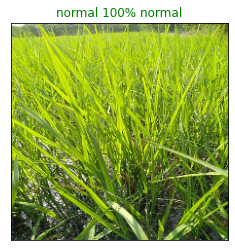

In [ ]:
plot_pred(prediction_probabilities=predictions_valid_data,
          labels=val_labels,
          images=val_images,
          n=99)

In [ ]:
# Let's check out a few predictions and their different values
i_multiplier = 30
num_rows = 20
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions_valid_data,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions_valid_data,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.savefig('VGG16(data_Augmented).png', facecolor='w')
plt.show()